In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
#df_clss = pd.read_excel('Iris.xlsx')
df = pd.read_csv('Ex1-Class-train.csv')
df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,g,o,u,9.43,25.38,-20.91,-25.84,4.08,B
1,id-002,-2.31,7.36,i,p,y,-3.94,NaN,31.65,12.95,9.82,C
2,id-003,-17.55,-4.09,f,l,v,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,g,p,x,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,i,l,v,2.23,11.76,1.34,4.16,-6.49,B
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,12.54,3.16,h,m,v,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,i,m,u,-10.61,-1.63,-8.81,18.60,10.92,B
487,id-488,13.72,-10.59,i,m,y,-32.73,-3.94,NaN,8.97,-8.30,C
488,id-489,-6.12,-6.37,e,m,u,22.34,-4.66,-10.86,-17.77,-0.21,C


In [240]:
df['y'].value_counts()

D    125
B    120
A    119
C    116
Name: y, dtype: int64

In [241]:
# Check missing data
df.isnull().sum()

id     10
x1     10
x2     10
x3     10
x4     10
x5     10
x6     10
x7     10
x8     10
x9     10
x10    10
y      10
dtype: int64

In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
LE = LabelEncoder()
df['y']=LE.fit_transform(df['y'])
df['y'].describe()

count    490.000000
mean       1.565306
std        1.169142
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: y, dtype: float64

In [244]:
df = df.fillna(0)

In [246]:
import string
alphabet = list(string.ascii_lowercase)
for count in range(len(alphabet)):
    df.x3 = df.x3.replace([alphabet[count]], ord(alphabet[count]))
    df.x4 = df.x4.replace([alphabet[count]], ord(alphabet[count]))
    df.x5 = df.x3.replace([alphabet[count]], ord(alphabet[count]))

In [247]:
# Uses all features
X = np.column_stack((df.x1, df.x2, df.x3, df.x4, df.x5, df.x6, df.x7, df.x8, df.x9, df.x10))
y = np.array(df.y)

In [248]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [249]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,20)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 10}

In [250]:
knn_final = KNeighborsClassifier(n_neighbors = 10)
knn_final.fit(X_train, y_train)
knn_final.score(X_test, y_test)

0.6598639455782312

In [251]:
accuracy = []
count = []
for i in range (1, 41):
  knn_manual = KNeighborsClassifier(n_neighbors = i)
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

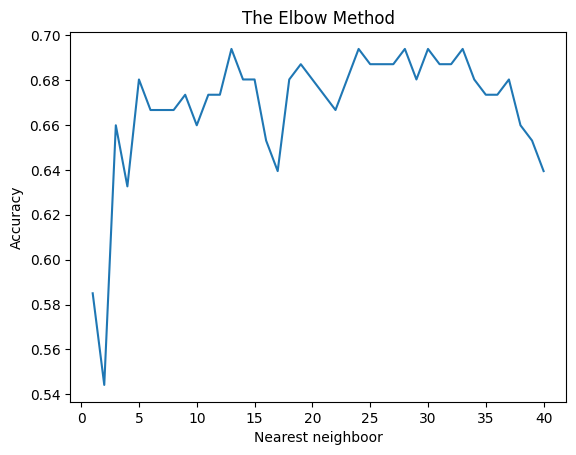

In [252]:
plt.title('The Elbow Method')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

In [253]:
print(accuracy)

[0.5850340136054422, 0.54421768707483, 0.6598639455782312, 0.6326530612244898, 0.6802721088435374, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.673469387755102, 0.6598639455782312, 0.673469387755102, 0.673469387755102, 0.6938775510204082, 0.6802721088435374, 0.6802721088435374, 0.6530612244897959, 0.6394557823129252, 0.6802721088435374, 0.6870748299319728, 0.6802721088435374, 0.673469387755102, 0.6666666666666666, 0.6802721088435374, 0.6938775510204082, 0.6870748299319728, 0.6870748299319728, 0.6870748299319728, 0.6938775510204082, 0.6802721088435374, 0.6938775510204082, 0.6870748299319728, 0.6870748299319728, 0.6938775510204082, 0.6802721088435374, 0.673469387755102, 0.673469387755102, 0.6802721088435374, 0.6598639455782312, 0.6530612244897959, 0.6394557823129252]


In [254]:
DT = pd.read_csv("Ex1-Class-unseen.csv")
DT

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Q01,-9.06,-6.24,e,l,y,-17.25,13.47,-9.97,-9.37,8.36
1,Q02,-10.93,-0.05,e,l,y,-5.69,-6.59,-8.48,-17.99,-8.84
2,Q03,-9.06,0.07,e,p,y,-26.56,7.69,-15.15,-9.59,-21.66
3,Q04,5.94,10.92,h,n,v,36.03,-2.95,22.84,-16.83,7.12
4,Q05,27.87,37.07,i,m,u,1.32,0.71,-17.56,-6.77,4.05
5,Q06,-9.49,1.17,g,n,u,31.70,-18.75,3.05,5.02,19.09
6,Q07,1.78,-1.09,e,l,u,41.81,8.74,-2.88,-42.59,-5.83
7,Q08,-5.82,8.85,e,p,u,30.82,7.79,-20.49,-41.73,-1.85
8,Q09,-6.36,-2.47,e,l,y,-2.79,21.72,-6.36,-27.26,-13.94
9,Q10,-16.34,-8.00,g,o,u,1.29,-7.36,-11.29,23.43,-2.02


In [255]:
import string
alphabet = list(string.ascii_lowercase)
for count in range(len(alphabet)):
    DT.x3 = DT.x3.replace([alphabet[count]], ord(alphabet[count]))
    DT.x4 = DT.x4.replace([alphabet[count]], ord(alphabet[count]))
    DT.x5 = DT.x3.replace([alphabet[count]], ord(alphabet[count]))

In [256]:
# Uses All Features
X_new = np.column_stack((DT.x1, DT.x2, DT.x3, DT.x4, DT.x5, DT.x6, DT.x7, DT.x8, DT.x9, DT.x10))

In [257]:
# y_new = LE.fit_transform(y_new)

In [258]:
knn_new = KNeighborsClassifier(n_neighbors = 10)
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_new)
# Print the accuracy
knn_new.score(X_train, y_train)

0.685131195335277

In [259]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('A')
  elif y_pred[i] == 1:
    diag.append('B')
  elif y_pred[i] == 2:
    diag.append('C')
  else:
    diag.append('D')

diag

['D', 'A', 'A', 'B', 'B', 'D', 'C', 'C', 'A', 'D']

In [262]:
special = 'DAABBDCCAD'
special_list = []
for x in special:
    special_list.append(x)

# print(special_list)
count = 0
for x in range(len(diag)):
    print('loop:', x)
    if diag[x] == special_list[x]:
        count += 1
        
        print("increment by", count)

loop: 0
increment by 1
loop: 1
increment by 2
loop: 2
increment by 3
loop: 3
increment by 4
loop: 4
increment by 5
loop: 5
increment by 6
loop: 6
increment by 7
loop: 7
increment by 8
loop: 8
increment by 9
loop: 9
increment by 10
